In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [2]:
with open('../data/heart_cleveland_upload.csv') as file_csv:
    df = pd.read_csv(file_csv)

**Description**

1) age: age in years

2) sex: sex (1 = male; 0 = female)

3) cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
4) trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5) chol: serum cholestoral in mg/dl
6) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7) restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8) thalach: maximum heart rate achieved
9) exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
10) slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
11) ca: number of major vessels (0-3) colored by flourosopy
12) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
13) condition: 0 = no disease, 1 = disease


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [3]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


<AxesSubplot:>

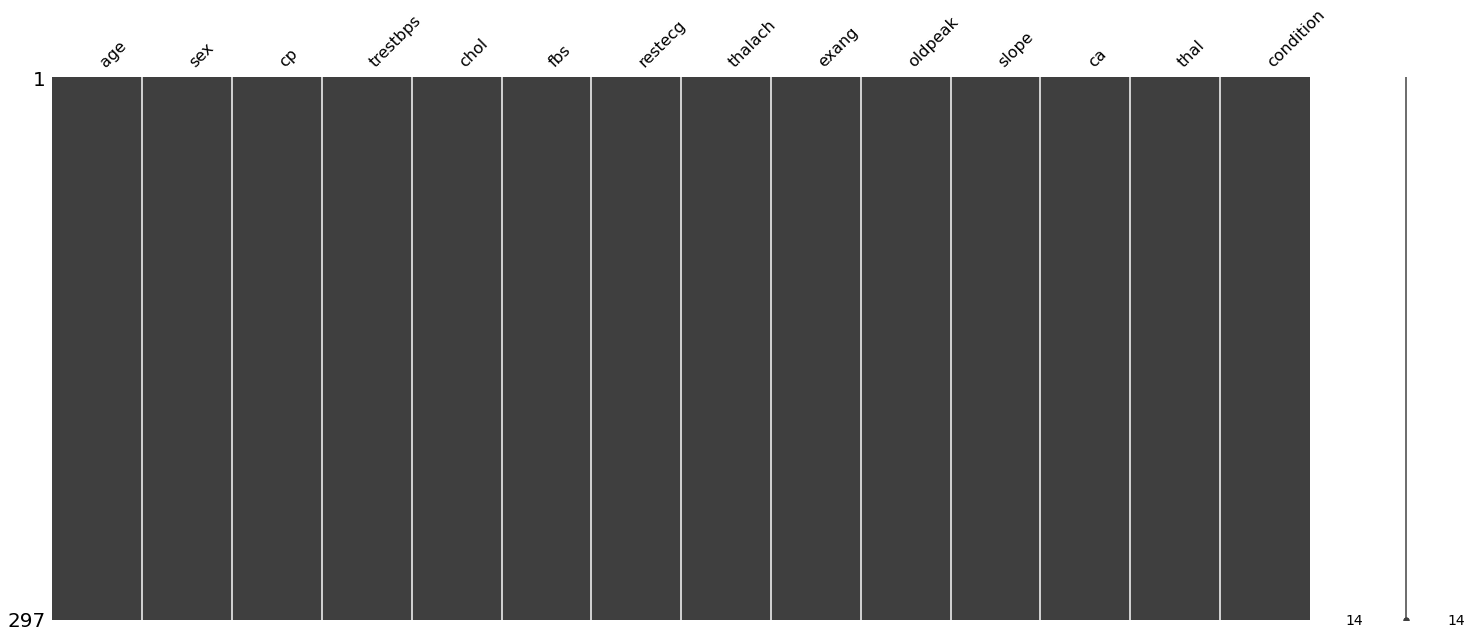

In [20]:
msno.matrix(df.sample(297))

<AxesSubplot:title={'center':'Correlation heatmap'}>

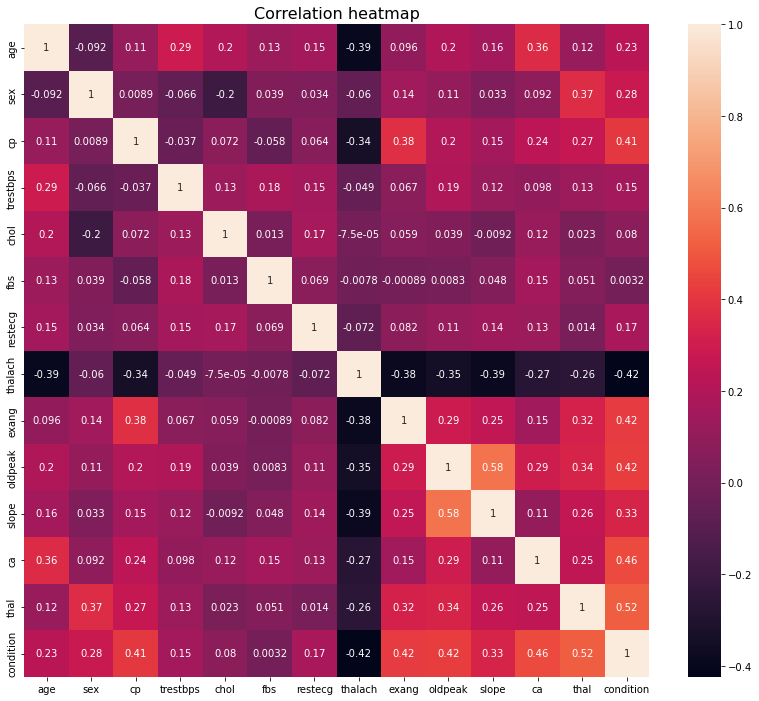

In [47]:
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation heatmap', y=1, size=16)
correlation = df.corr()
sns.heatmap(correlation, annot=True)

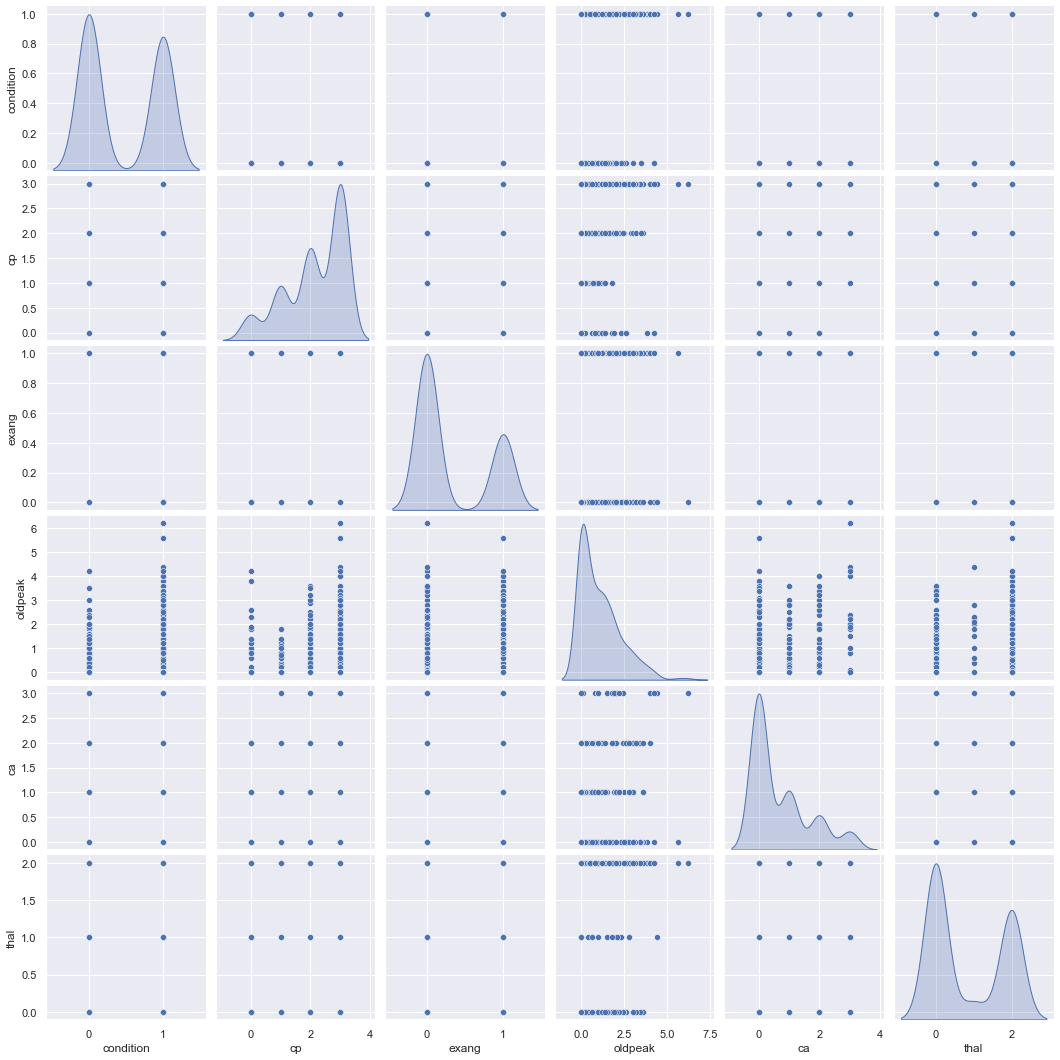

In [52]:
sns.set()
columns = ['condition', 'cp', 'exang', 'oldpeak', 'ca', 'thal']
sns.pairplot(df[columns], kind ='scatter', diag_kind='kde')
plt.show()

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'condition'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

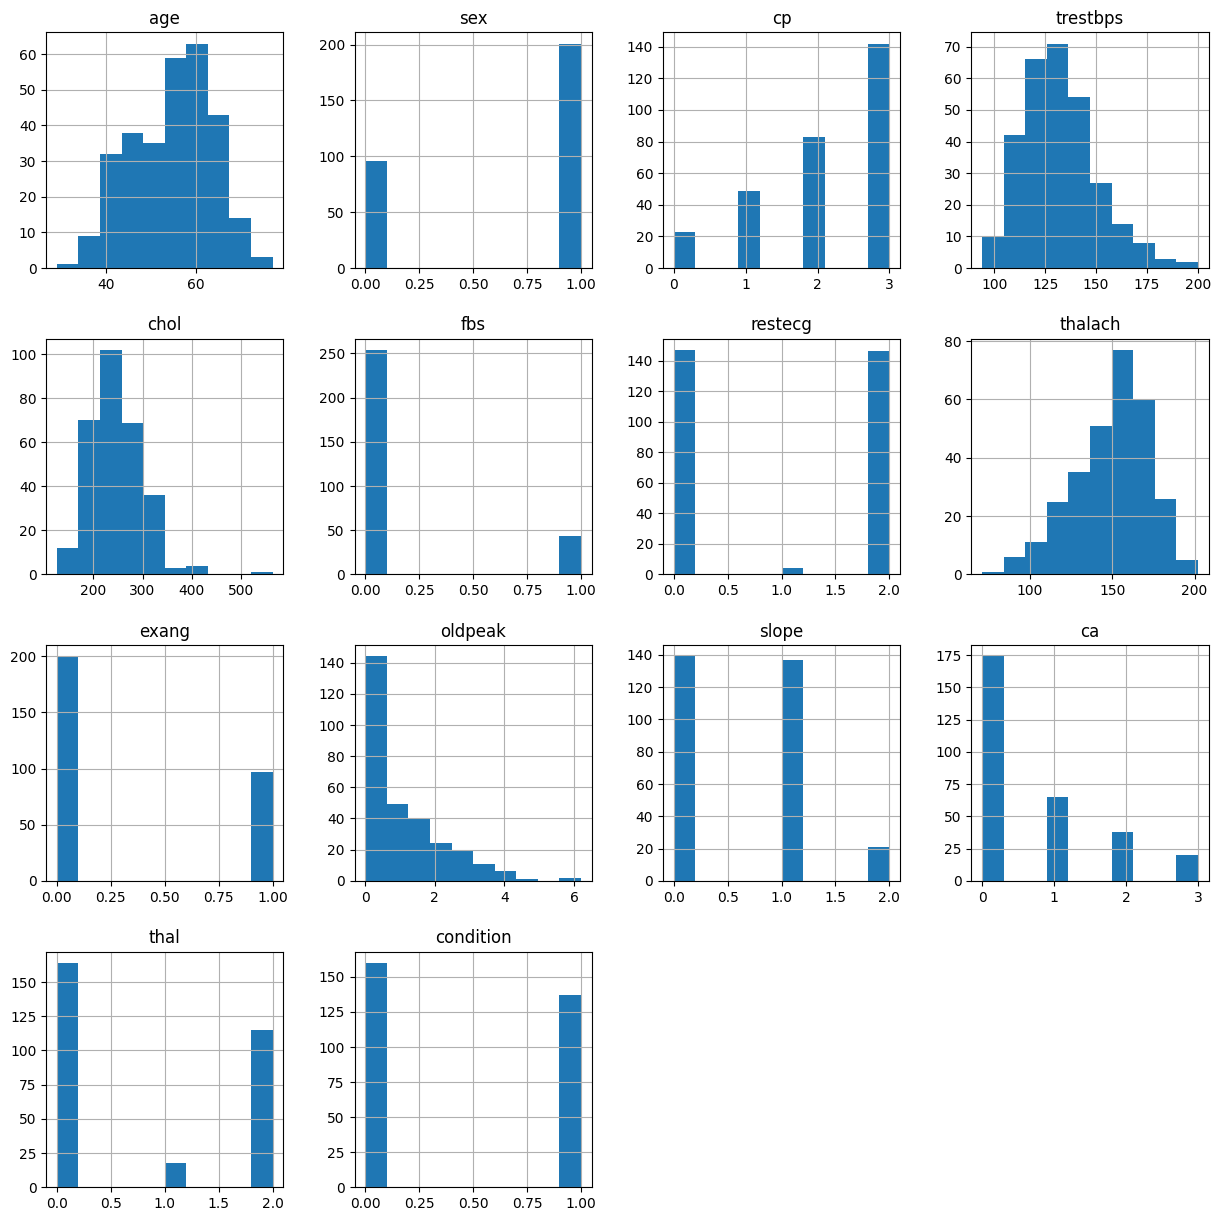

In [7]:
df.hist(figsize=(15, 15))